# Оценка страховой стоимости транспортного средства

Первая задача Открытого чемпионата Финансового университета по машинному обучению - 2018

In [342]:
import pandas as pd
import numpy as np

In [343]:
train = pd.read_csv('datasets/finu1/insvalue_train.csv')
test = pd.read_csv('datasets/finu1/insvalue_test.csv')
subm = pd.read_csv('datasets/finu1/insvalue_sample.csv')

In [344]:
train['is_train'] = 1
test['is_test'] = 1

df = train.append(test)

df.sample(11)

,column_1,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,...,column_4,column_5,column_6,column_7,column_8,column_9,id,is_test,is_train,target
9690,2,123.0,2,0,56.753996,1,c0,0,a,4.790831,...,b0,b0,44.0,q1,27000.0,6,NaN,NaN,1.0,3.153201e+05
6603,2,123.0,51,0,47.742021,1,c0,0,a,4.772214,...,b0,b0,37.0,q1,1.0,3,NaN,NaN,1.0,4.669868e+05
607,2,123.0,9,6,47.742021,1,c0,0,a,3.096325,...,b0,b0,20.0,q1,37500.0,5,608.0,1.0,NaN,NaN
14832,2,116.0,16,0,52.915733,1,c4,0,c,5.297602,...,b20,b20,56.0,q1,15000.0,7,NaN,NaN,1.0,2.514605e+05
12487,2,105.0,3,0,89.947280,1,c4,0,e,1.509196,...,b37,b37,64.0,q1,6700.0,4,NaN,NaN,1.0,3.767172e+05
5838,1,141.0,14,0,58.025786,1,c3,0,d,0.738331,...,b0,b0,73.0,q1,74000.0,6,NaN,NaN,1.0,5.665062e+05
19117,2,140.0,19,0,83.961901,1,c1,0,c,6.387017,...,b353,b353,31.0,q1,20000.0,5,NaN,NaN,1.0,5.553148e+05
278,1,115.0,24,0,50.337125,1,c1,0,c,7.614102,...,b0,b0,27.0,q1,45000.0,6,NaN,NaN,1.0,3.474754e+05
21804,2,282.0,3,0,98.221331,1,c3,0,j,5.966099,...,b0,b0,0.0,q1,0.0,5,NaN,NaN,1.0,1.561725e+06
7998,2,150.0,5,0,75.467879,1,c4,0,e,4.259877,...,b0,b0,39.0,q1,30000.0,5,NaN,NaN,1.0,5.121935e+05


In [345]:
df['automodel_plus_year'] = df['column_17'].astype(str) + ' ' + df['column_9'].astype(str)
df['automodel_plus_year_mean'] = df.groupby('automodel_plus_year')['target'].transform('mean')

#df['automodel_mean'] = df.groupby('column_17')['target'].transform('mean')
#df['automodel_median'] = df.groupby('column_17')['target'].transform('median')
#df['automodel_max'] = df.groupby('column_17')['target'].transform('max')

df['motorpower_mean'] = df.groupby('column_10')['target'].transform('mean')
df['motorpower_median'] = df.groupby('column_10')['target'].transform('median')
df['motorpower_max'] = df.groupby('column_10')['target'].transform('max')

#df['autoyear_mean'] = df.groupby('column_9')['target'].transform('mean')
#df['autoyear_median'] = df.groupby('column_9')['target'].transform('median')
#df['autoyear_max'] = df.groupby('column_9')['target'].transform('max')

In [346]:
cols = df.columns
cols

Index(['column_1', 'column_10', 'column_11', 'column_12', 'column_13',
       'column_14', 'column_15', 'column_16', 'column_17', 'column_18',
       'column_2', 'column_3', 'column_4', 'column_5', 'column_6', 'column_7',
       'column_8', 'column_9', 'id', 'is_test', 'is_train', 'target',
       'automodel_plus_year', 'automodel_plus_year_mean', 'motorpower_mean',
       'motorpower_median', 'motorpower_max'],
      dtype='object')

In [347]:
for c in cols:
    if df[c].dtype == 'object':
        df[c] = df[c].factorize()[0].astype(np.int64)

In [348]:
df.sample(7)

,column_1,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,...,column_9,id,is_test,is_train,target,automodel_plus_year,automodel_plus_year_mean,motorpower_mean,motorpower_median,motorpower_max
16796,2,224.0,0,0,68.071719,1,0,0,3,6.742827,...,4,NaN,NaN,1.0,1.375651e+06,15,1.158123e+06,1.246839e+06,1.240941e+06,1.653663e+06
3344,2,249.0,20,2,55.478435,1,0,0,5,1.885607,...,6,NaN,NaN,1.0,1.132670e+06,24,6.586667e+05,1.695884e+06,1.375775e+06,4.833195e+06
16284,2,468.0,14,3,38.519899,1,3,0,7,1.692229,...,5,NaN,NaN,1.0,1.817507e+06,8,1.395017e+06,1.913280e+06,1.893825e+06,2.096958e+06
2776,1,174.0,30,19,58.025786,1,1,0,8,5.782659,...,7,NaN,NaN,1.0,6.274440e+05,75,5.569066e+05,6.118382e+05,6.024040e+05,8.792021e+05
261,2,175.0,24,0,80.338555,1,1,0,1,5.119087,...,4,262.0,1.0,NaN,NaN,1,4.727195e+05,8.887345e+05,8.743331e+05,1.247590e+06
1902,2,190.0,24,1,58.025786,1,2,0,9,2.650624,...,6,NaN,NaN,1.0,7.658639e+05,46,5.509111e+05,8.708310e+05,8.463116e+05,1.304706e+06
84,2,140.0,11,2,69.312262,1,0,0,6,5.046770,...,7,NaN,NaN,1.0,2.632538e+05,7,3.220933e+05,4.427568e+05,4.076414e+05,9.691993e+05


In [402]:
X_train = df[df['is_train'] == 1].drop('target', axis=1)[['automodel_plus_year_mean', 'motorpower_mean','automodel_plus_year','motorpower_median','column_10','motorpower_max', 'column_8']]
X_test = df[df['is_test'] == 1].drop('target', axis=1)[['automodel_plus_year_mean', 'motorpower_mean','automodel_plus_year','motorpower_median','column_10','motorpower_max', 'column_8']]

y_train = df[df['is_train'] == 1]['target']

In [403]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_te = X_test

X_tr.shape, X_te.shape, X_va.shape

((19608, 7), (3662, 7), (4903, 7))

In [404]:
cat_cols = []

cols = X_train.columns

for c in cols:
    if df[c].dtype == 'int64':
        cat_cols.append(c)

In [405]:
cat_cols

['automodel_plus_year']

In [406]:
import lightgbm as lgb
import gc

tr_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_cols)
va_data = lgb.Dataset(X_va, label=y_va, categorical_feature=cat_cols, reference=tr_data)

gc.collect()

# Train the model
parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mean_absolute_percentage_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 50,
}


model = lgb.train(parameters,
                  tr_data,
                  valid_sets=va_data,
                  num_boost_round=50000,
                  early_stopping_rounds=120,
                  verbose_eval=50)

/home/oleg/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/oleg/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


Training until validation scores don't improve for 120 rounds.
[50]	valid_0's mape: 0.675316
[100]	valid_0's mape: 0.66774
[150]	valid_0's mape: 0.660185
[200]	valid_0's mape: 0.652629
[250]	valid_0's mape: 0.645101
[300]	valid_0's mape: 0.63762
[350]	valid_0's mape: 0.630174
[400]	valid_0's mape: 0.622763
[450]	valid_0's mape: 0.615424
[500]	valid_0's mape: 0.608133
[550]	valid_0's mape: 0.600873
[600]	valid_0's mape: 0.59368
[650]	valid_0's mape: 0.586479
[700]	valid_0's mape: 0.579328
[750]	valid_0's mape: 0.572263
[800]	valid_0's mape: 0.565163
[850]	valid_0's mape: 0.558115
[900]	valid_0's mape: 0.551105
[950]	valid_0's mape: 0.544188
[1000]	valid_0's mape: 0.537405
[1050]	valid_0's mape: 0.530598
[1100]	valid_0's mape: 0.523769
[1150]	valid_0's mape: 0.516965
[1200]	valid_0's mape: 0.510175
[1250]	valid_0's mape: 0.503385
[1300]	valid_0's mape: 0.496652
[1350]	valid_0's mape: 0.489974
[1400]	valid_0's mape: 0.483207
[1450]	valid_0's mape: 0.476507
[1500]	valid_0's mape: 0.469986


[12750]	valid_0's mape: 0.101183
[12800]	valid_0's mape: 0.101118
[12850]	valid_0's mape: 0.101018
[12900]	valid_0's mape: 0.100926
[12950]	valid_0's mape: 0.100896
[13000]	valid_0's mape: 0.100793
[13050]	valid_0's mape: 0.1007
[13100]	valid_0's mape: 0.100632
[13150]	valid_0's mape: 0.100625
[13200]	valid_0's mape: 0.10051
[13250]	valid_0's mape: 0.100435
[13300]	valid_0's mape: 0.100371
[13350]	valid_0's mape: 0.100217
[13400]	valid_0's mape: 0.100127
[13450]	valid_0's mape: 0.100074
[13500]	valid_0's mape: 0.0999946
[13550]	valid_0's mape: 0.099812
[13600]	valid_0's mape: 0.0998024
[13650]	valid_0's mape: 0.0997346
[13700]	valid_0's mape: 0.099672
[13750]	valid_0's mape: 0.0996375
[13800]	valid_0's mape: 0.0995137
[13850]	valid_0's mape: 0.0994577
[13900]	valid_0's mape: 0.0993784
[13950]	valid_0's mape: 0.0992867
[14000]	valid_0's mape: 0.099299
[14050]	valid_0's mape: 0.0991622
[14100]	valid_0's mape: 0.0989857
[14150]	valid_0's mape: 0.0989559
[14200]	valid_0's mape: 0.0988629
[

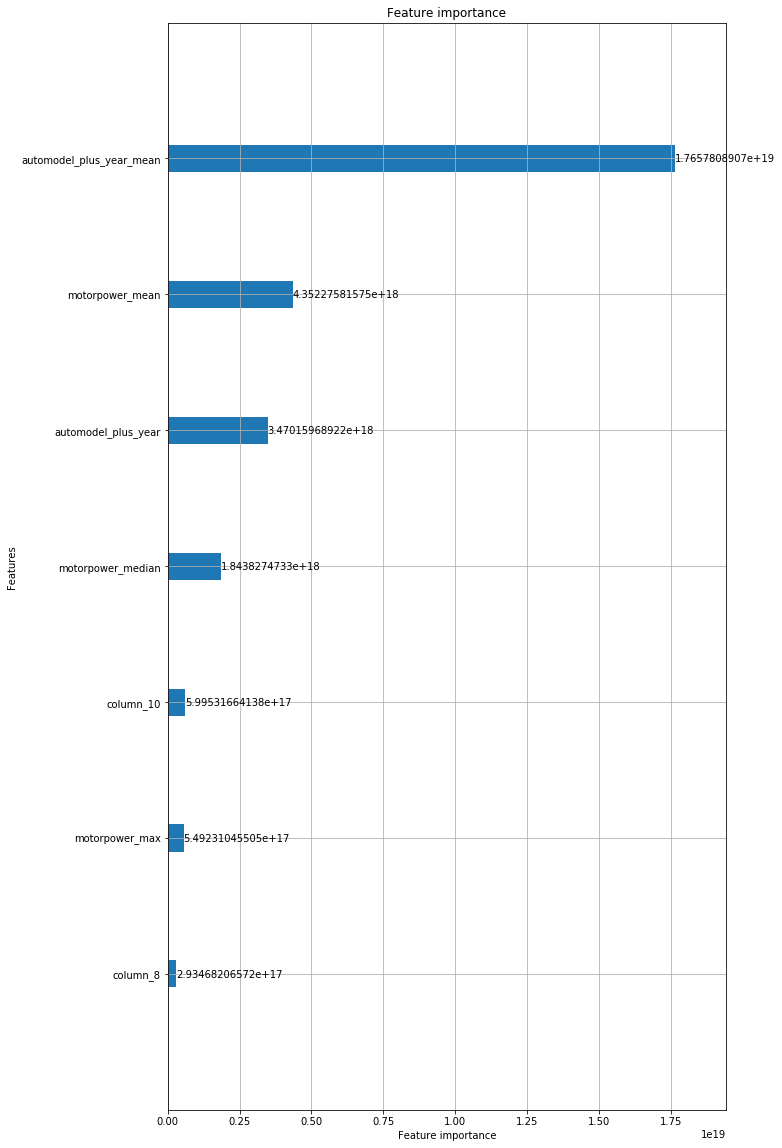

In [407]:
%matplotlib inline
lgb.plot_importance(model, importance_type='gain', figsize=(10,20))

In [408]:
y_te = model.predict(X_test)

In [409]:
subm['target'] = y_te
subm.head()

,id,target
0,1,7.291099e+05
1,2,9.307525e+05
2,3,7.071573e+05
3,4,1.372992e+06
4,5,5.957186e+05


In [410]:
subm.to_csv('finu1.csv', index=False)